## Import libraries

In [3]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt
import matplotlib.image as img

## Images

### Asensio

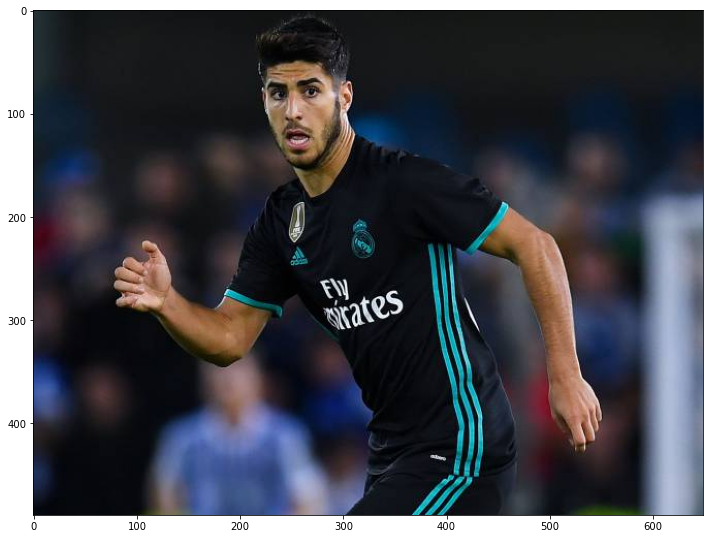

In [188]:
asensio = img.imread('images/asensio.jpg')

fig = plt.figure(figsize=(12, 12))
plt.imshow(asensio)

### MiNI PW

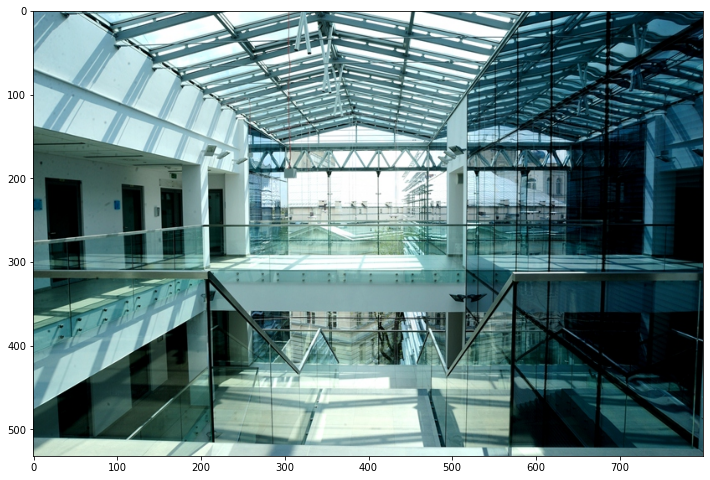

In [79]:
mini = img.imread('images/mini-pw.jpg')

fig = plt.figure(figsize=(12, 12))
plt.imshow(mini)

## Functions

In [127]:
def image_info(image, image_name: str) -> None:
    print(f'Image {image_name} shape: {image.shape}')
    print(f'Image {image_name} nbytes: {image.nbytes} \n')

In [128]:
def image_reshape(image):
    return np.reshape(image, (image.shape[1], image.shape[2] * image.shape[0]))

In [186]:
def image_print(pca, image_3d, image_2d):
    image_size = (image_3d.shape[0], image_3d.shape[1], image_3d.shape[2])
    inverse_pca = pca.inverse_transform(image_2d)
    
    image = np.reshape(inverse_pca, image_size)
    image = image.astype('uint8')
    fig, axes = plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [130]:
def pca_process(pca_value: int, image):
    pca = PCA(pca_value)
    image_c = image_reshape(image)
    compressed_image = pca.fit_transform(image_c)
    
    return pca, compressed_image

In [131]:
def pca_all(pca_value: int, image, image_name: str):
    pca, compressed_image = pca_process(pca_value, image)
    
    image_info(compressed_image, f'Compressed {image_name}')
    image_print(pca, image, compressed_image)

In [190]:
from IPython.display import clear_output


def pca_stats(image, x=(10, 400, 10)):
    results = []
    size = image.nbytes
    
    
    for num_com in range(x[0], x[1], x[2]):
        print(f'Loading: {round((num_com - x[0])/(x[1] - x[0]) * 100, 2)} %')
        pca, compressed_image = pca_process(num_com, image)
        compressed_size = compressed_image.nbytes
        
        results.append(size/compressed_size)
        
        clear_output(wait=True)

        
    plt.scatter(range(x[0], x[1], x[2]), results)

In [183]:
def print_examples(image, pca_values=[10, 50, 100, 150, 200, 250]):    
    for num, val in enumerate(pca_values):
        
        pca, compressed_image = pca_process(val, image)

        image_print(pca, image, compressed_image)

## Basic info

In [189]:
image_info(asensio, 'Asensio')

image_info(mini, 'MiNI PW')

Image Asensio shape: (489, 649, 3)
Image Asensio nbytes: 952083 

Image MiNI PW shape: (532, 800, 3)
Image MiNI PW nbytes: 1276800 



Zdjęcia mają rozmiary odpowiednio: 318kB oraz 27kB.

## Compressed image

### Asensio

Image Compressed Asensio shape: (649, 100)
Image Compressed Asensio nbytes: 519200 



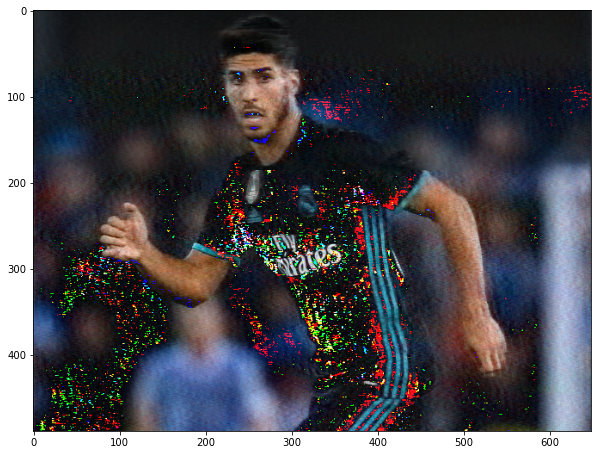

In [138]:
pca_all(100,  asensio, "Asensio")

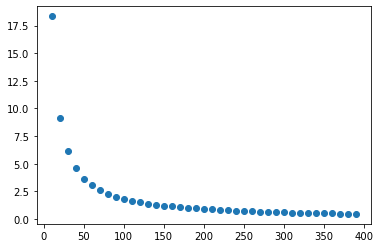

In [191]:
pca_stats(asensio)

### MiNI PW

Image Compressed MiNI PW shape: (800, 200)
Image Compressed MiNI PW nbytes: 1280000 



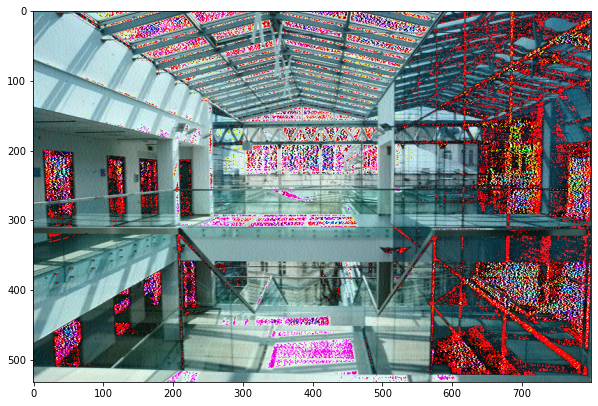

In [152]:
pca_all(200, mini, "MiNI PW")

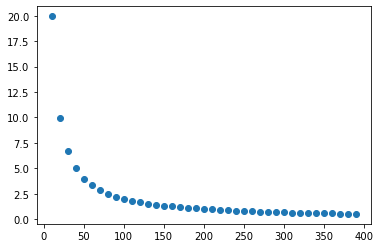

In [148]:
pca_stats(mini)

## More examples

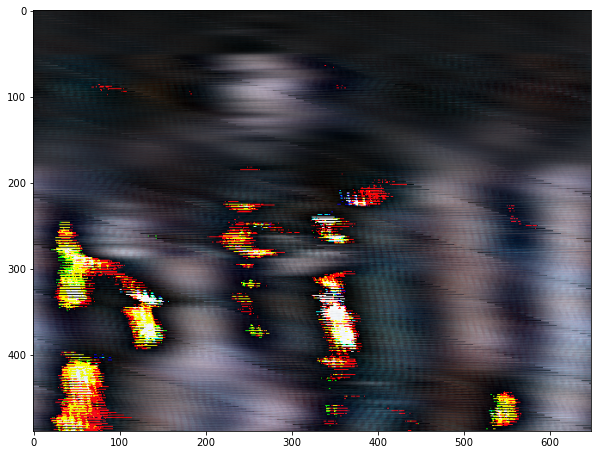

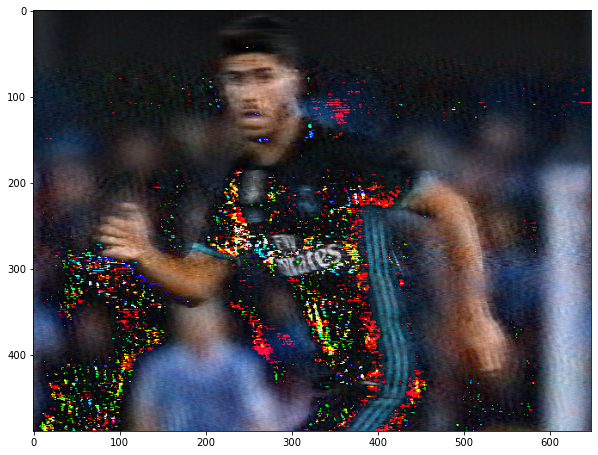

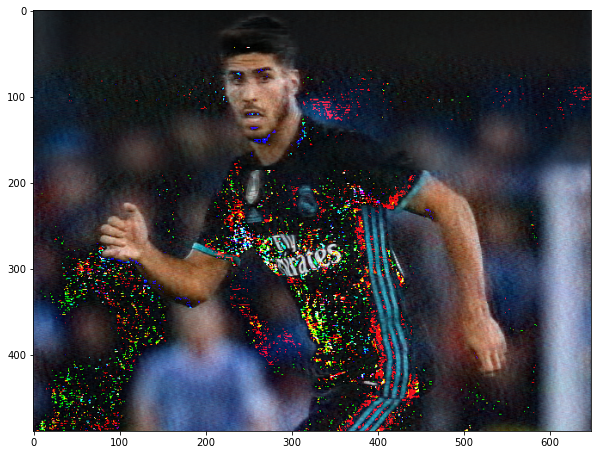

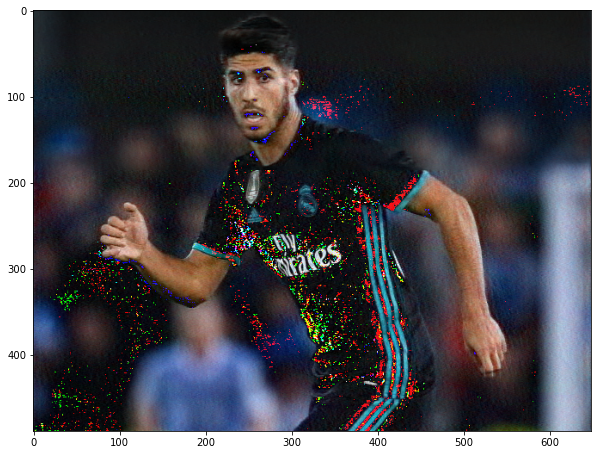

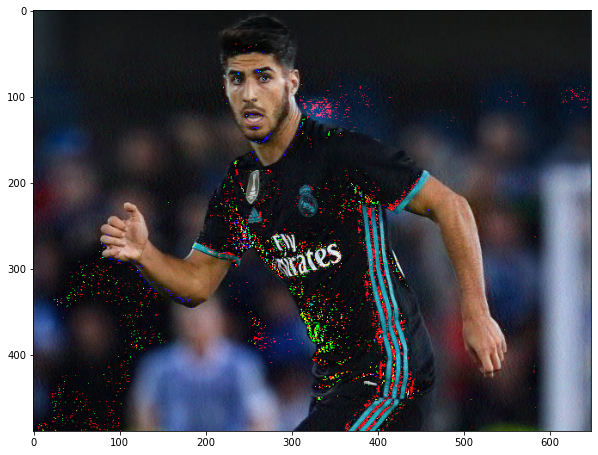

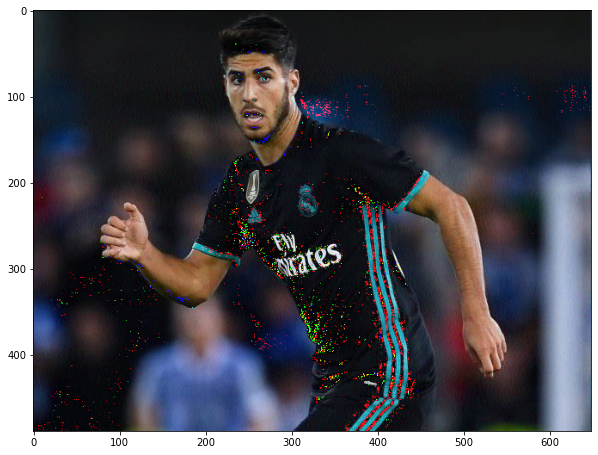

In [184]:
print_examples(asensio)

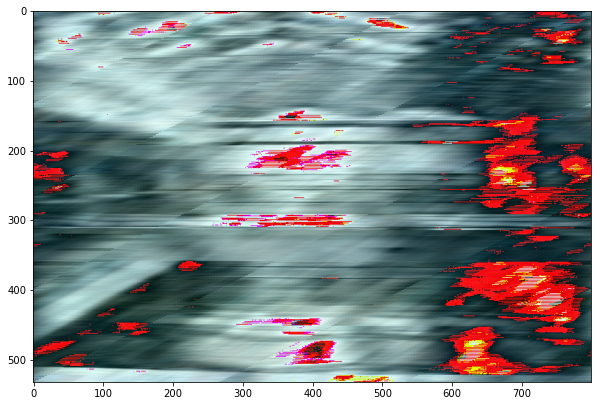

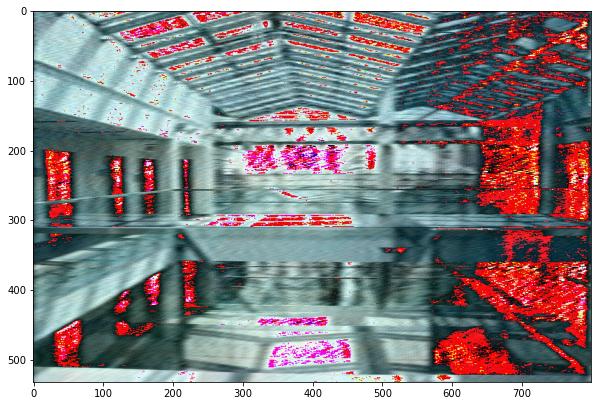

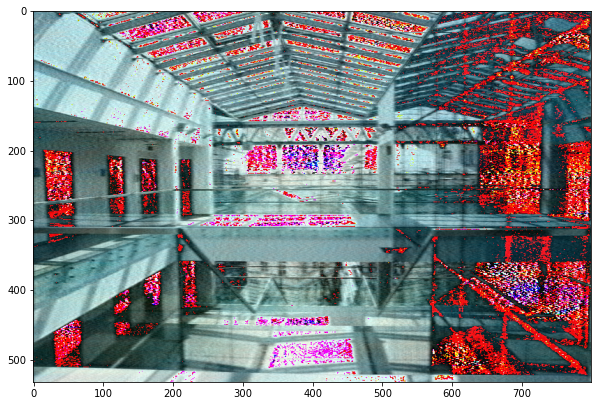

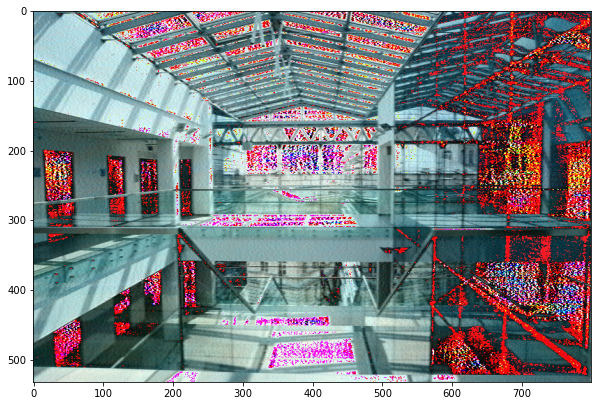

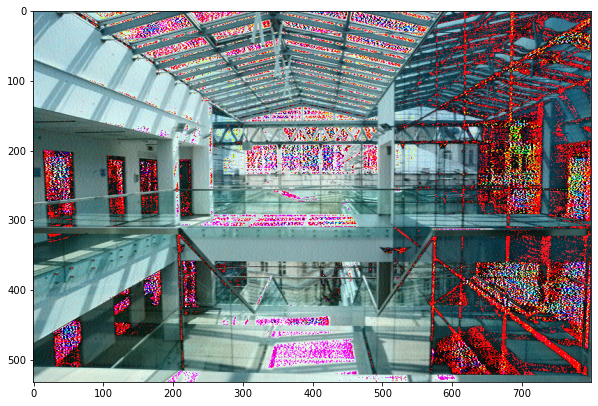

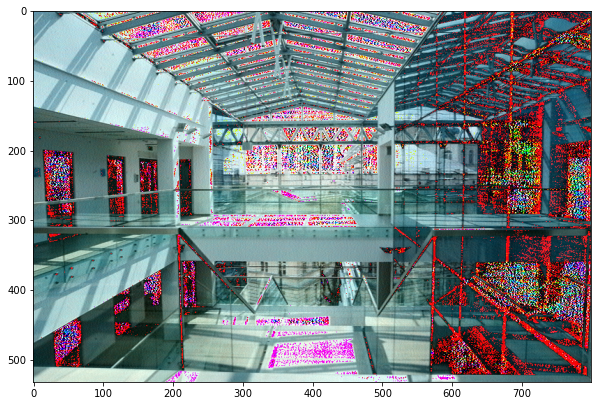

In [185]:
print_examples(mini)

## Conclusions

Jak widzimy z badań PCA nadaje się na kompresie danych. Jednak zawiera ona pewne wady co widzimy na przykładach powyżej. 

Warto też zauważyć, że dla dużej wartości komponentów "waga" pliku rośnie - jest większa niż oryginalnego.

W przypadku Asensio można było zauważyć, że jakoś nie była dużo gorsza po zastosowaniu PCA. W przypadku MiNI PW rezultaty są już jednak inne - kompresja wyszła gorzej.